# Uppgift 1

- Läs in bladet "Veckodata Riket" från excel ark

In [49]:
import pandas as pd #imported pandas 


# läser in datan specifikt till excel bladet "Veckodata Riket"
veckodata_riket = pd.read_excel("../Labb/Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Veckodata Riket")



### a) 
- Gör initial dataanalys överdatasetet

In [50]:
# Lyfter ut de fem första raderna ur datasetet
veckodata_riket.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [51]:
#Städar och döper om kolumn namnen
veckodata_riket = veckodata_riket.rename(dict(år = "År", veckonummer = "Veckonummer", Antal_fall_vecka = "Antal fall per vecka", Antal_fall_100000inv_vecka = "Fall per 100000 inv /vecka", 
Antal_fall_100000inv_14dagar = "Fall per 100000 inv /14 dagar", Kum_antal_fall = "Kum ant fall", Kum_fall_100000inv = "Kum antal fall /100000 inv",
Antal_nyaintensivvårdade_vecka = "Nya int.vård per vecka", Kum_antal_intensivvårdade = "Kum antal int.vårdade", Antal_avlidna_vecka = "Antal avlidna per vecka",
Antal_avlidna_milj_inv_vecka = "Antal avlidna /milj.inv - vecka", Kum_antal_avlidna = "Kum antal avlidna", 
Kum_antal_avlidna_milj_inv = "Kum antal avlidna /milj inv"), axis = 1)

In [52]:
# Nedan ser vi att datan består av 144 rader och 13 kolumner
veckodata_riket.shape

(144, 13)

In [53]:
# överblickande information. Vi ser här att datan har lästs in korret, då vi inte har några missing values
# vi ser även de olika datatyperna per kolumn samt indexnr för kolumnerna
veckodata_riket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   År                               144 non-null    int64  
 1   Veckonummer                      144 non-null    int64  
 2   Antal fall per vecka             144 non-null    int64  
 3   Fall per 100000 inv /vecka       144 non-null    int64  
 4   Fall per 100000 inv /14 dagar    144 non-null    int64  
 5   Kum ant fall                     144 non-null    int64  
 6   Kum antal fall /100000 inv       144 non-null    int64  
 7   Nya int.vård per vecka           144 non-null    int64  
 8   Kum antal int.vårdade            144 non-null    int64  
 9   Antal avlidna per vecka          144 non-null    int64  
 10  Antal avlidna /milj.inv - vecka  144 non-null    float64
 11  Kum antal avlidna                144 non-null    int64  
 12  Kum antal avlidna /mil

### b)
- slå ihop kolumnerna "är" och "veckonummer"

In [54]:
# typomvandlar "år" och "veckonummer" från int till str för att kunna konkatenera de två kolumnerna till en med + operatorn
veckodata_riket["Vecka"] = veckodata_riket["År"].astype(str) + "v" + veckodata_riket["Veckonummer"].astype(str)
veckodata_riket["Vecka"].head()

0     2020v6
1     2020v7
2     2020v8
3     2020v9
4    2020v10
Name: Vecka, dtype: object

### c)
- Rita linjediagram som visar avlidna per vecka från 2020v6 till nu i både seaborn och plotly 

In [60]:
#sparar ner column vecka i en egen variabel
vecka = veckodata_riket["Vecka"]

In [96]:
#sparar ner antalet avlidna per vecka i egen variabel
avlidna_per_vecka = veckodata_riket["Antal avlidna per vecka"]
nya_fall_per_vecka = veckodata_riket["Antal fall per vecka"]

In [80]:
#importerar nödvändiga libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#plotly linjediagram av antalet avlidna per vecka 6 2020 till nu 
fig = px.line(veckodata_riket, x = "Vecka", y = "Antal avlidna per vecka", title = "Antalet avlidna i Sverige per vecka")
fig.show()
fig.write_html("../Labb/Visualiseringar/avlidna_per_vecka_plotly.html") #sparar visualisering i mappen som html-fil

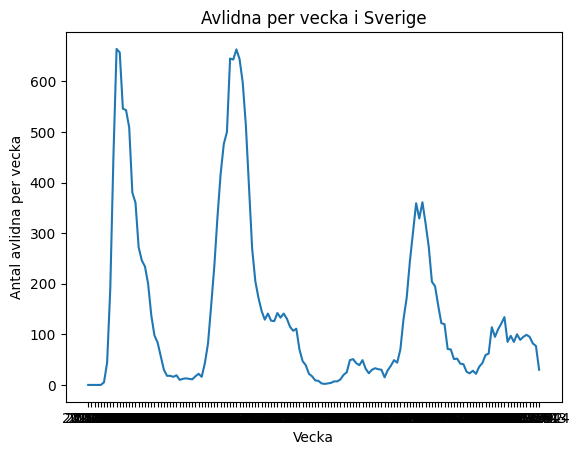

In [79]:
# seaborn plot som sedan sparas ner som PNG till mappen visualiseringar
sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal avlidna per vecka").set(title = 'Avlidna per vecka i Sverige')
plt.savefig("../Labb/Visualiseringar/avlidna_per_vecka_seaborn.png", facecolor = "white")

d)
- Rita linjediagram som visar nya fall per vecka från 2020v6 till nu

In [81]:
veckodata_riket.head()

,År,Veckonummer,Antal fall per vecka,Fall per 100000 inv /vecka,Fall per 100000 inv /14 dagar,Kum ant fall,Kum antal fall /100000 inv,Nya int.vård per vecka,Kum antal int.vårdade,Antal avlidna per vecka,Antal avlidna /milj.inv - vecka,Kum antal avlidna,Kum antal avlidna /milj inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


In [84]:
# återupprepar ovanstående steg
fig = px.line(veckodata_riket, x = "Vecka", y = "Antal fall per vecka", title = "Antalet nya fall i Sverige per vecka")
fig.show()
fig.write_html("../Labb/Visualiseringar/nya_fall_per_vecka.html") #sparar visualisering i mappen som html-fil

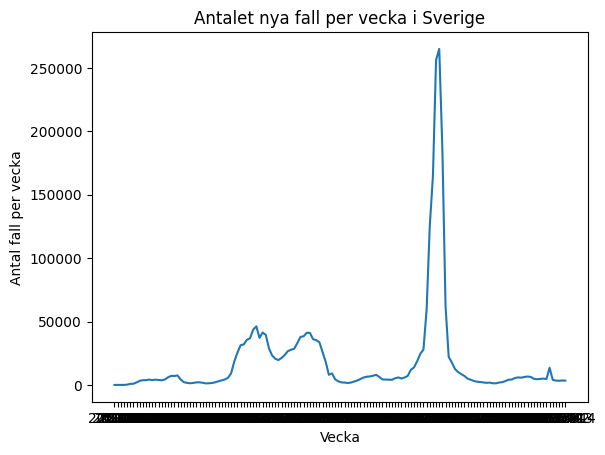

In [95]:
# seaborn plot som sedan sparas ner som PNG till mappen visualiseringar
ax = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal fall per vecka").set(title = 'Antalet nya fall per vecka i Sverige')
plt.savefig("../Labb/Visualiseringar/Antall_nya_fall_per_vecka.png", facecolor = "white")

## e)
- rita linjediagram av både avlidna fall per vecka och nya fall per vecka

In [104]:
# skapar ny dataframe endast innehållande kolumner, vecka, antall fall och avlidna per vecka
df = pd.DataFrame(veckodata_riket, columns =["Vecka", "Antal fall per vecka", "Antal avlidna per vecka"])
df

,Vecka,Antal fall per vecka,Antal avlidna per vecka
0,2020v6,1,0
1,2020v7,0,0
2,2020v8,0,0
3,2020v9,13,0
4,2020v10,211,0
...,...,...,...
139,2022v40,3999,99
140,2022v41,3402,95
141,2022v42,3274,82
142,2022v43,3497,77


In [106]:
# plotly med två y-värden representerade
fig = px.line(df, y = ["Antal fall per vecka", "Antal avlidna per vecka"], x = "Vecka")
fig.show()
fig.write_html("../Labb/Visualiseringar/nya_fall_och_avlidna_per_vecka.html") #sparar visualisering i mappen som html-fil


<AxesSubplot: ylabel='Antal avlidna per vecka'>

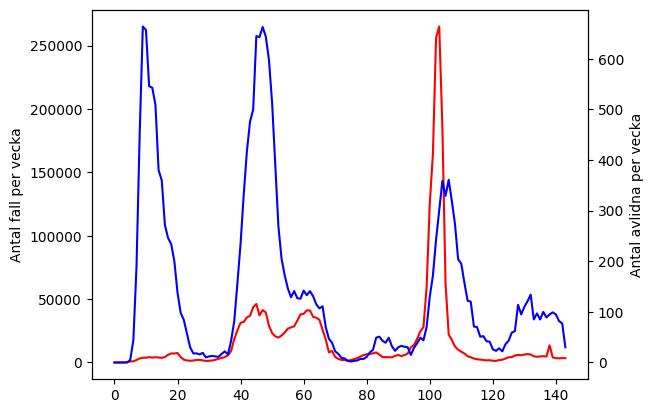

In [121]:
# den härgick inge vidare, förstod mig inte på hur jag skulle kunna plotta den

sns.lineplot(data = df["Antal fall per vecka"], color = "r")
ax2 = plt.twinx()
sns.lineplot(data = df["Antal avlidna per vecka"], color = "b", ax = ax2)


### f)
- linjediagram av kumulativt antal fall från 2020v6 till nu

In [123]:
fig = px.line(veckodata_riket, x = "Vecka", y = "Kum ant fall", title = "Kumulativa antal fall i Sverige per vecka") #plotly diagram
fig.show()
fig.write_html("../Labb/Visualiseringar/kum_ant_fall_per_vecka.html") #sparar visualisering i mappen som html-fil

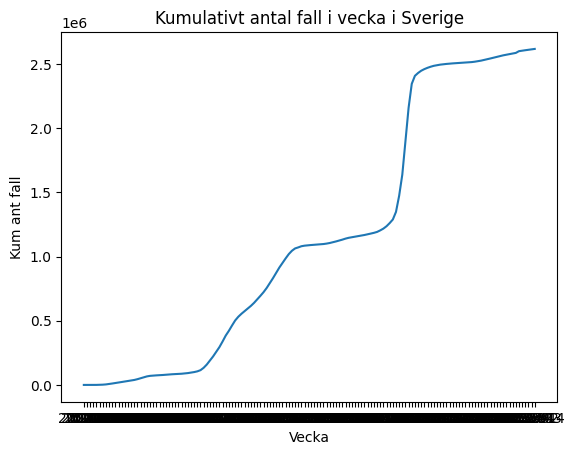

In [125]:
# Seaborn diagram 
ax = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Kum ant fall").set(title = 'Kumulativt antal fall i vecka i Sverige')
plt.savefig("../Labb/Visualiseringar/kum_ant_fall_seaborn.png", facecolor = "white")